<a href="https://colab.research.google.com/github/MIT-art/Capstone-Project/blob/main/Capstone_Project_Reference_Notebook_Full_Code_Marketing_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marketing Campaign Analysis**



### **The Context:**

 - Why is this problem important to solve?

 Capstone Project Customer Segmentation Context Customer segmentation is the process of dividing a data set of customers into groups of similar customers based on certain common characteristics usually for the purpose of understanding the population dataset in a better fashion.Understanding customer behavior and characteristics is usually a critical part of the marketing operations of any business ororganization,with direct consequences on sales & marketing strategy.Customer segmentation is often viewed as a means to achieve a better return on investment from marketing efforts,and make organizations more  efficient in terms of utilizing their money, time,and other critical resources in custom marketing strategies for different groups of customers based on their unique needs and motivations.For example,it has been understood from various research that customer segmentation often has a huge impact on people’s email engagement.Segmented campaigns often see over 100% more clicks than non-segmentedcampaigns,and email marketers who have segmented their audience be for ecampaigning have reported a 6-7 times growth in their overall revenue.It has also been observed in various contexts that in today’s world,individual  customers prefer personalized communications and offerings that cater to their particular interests.In the context of marketing analytics then,customer segmentation has a vital role to play in optimizing ROI.It typically involves analyzing metrics around customer engagement with various marketing activities including but not limited to,ATL(above the line)marketing activities,BTL(below the line)campaigns,and targeting personalized offers.Typically,the variables of interest are customer profiles,campaign conversion rates,and information associated with various marketing channels.Based on these feature categories,the target is to create the best possible customer segments from the given data.

### **The objective:**

 - What is the intended goal?
 Using Unsupervised Learning ideas such as Dimensionality Reduction and Clustering,the objective is to come up with the best possible customer segments using the given customer dataset and the best model.

### **The key questions:**

- What are the key questions that need to be answered?

    Which model performs better?
    Who are our customers? - Understanding the demographics, characteristics, and behaviors of our customers.
    How do our customers behave? - Analyzing customer spending patterns, response to campaigns, and interactions with our products and services.
    Which marketing campaigns are most effective? - Determining which marketing campaigns have the highest acceptance and response rates.
    How can we improve customer engagement? - Identifying strategies to enhance customer engagement and increase revenue.
    Are there distinct customer segments? - Exploring whether there are clear customer segments with unique preferences and needs.

### **The problem formulation**:

- What is it that we are trying to solve using data science?

Using data science, we aim to:

    Segment Customers: Divide the customer dataset into meaningful segments or clusters based on their shared characteristics and behaviors.
    Profile Customer Segments: Analyze and understand the distinct characteristics of each customer segment.
    Identify Campaign Effectiveness: Evaluate the performance of different marketing campaigns and determine which ones are most effective.
    Recommend Marketing Strategies: Provide data-driven recommendations on how to tailor marketing efforts to each customer segment for improved engagement and ROI.
    Optimize Resources: Help the organization make more efficient use of its resources, including time and money, by targeting specific customer groups with personalized marketing strategies.
    Enhance Customer Experience: Deliver personalized communications and offerings to cater to the unique needs and preferences of individual customers.

By addressing these questions and objectives, the goal is to leverage data science to gain insights, improve marketing strategies, and ultimately drive business success.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/MIT CP/MIT/marketing_campaign+%284%29(1).csv")

In [ ]:
# Display the shape (number of rows and columns) of the dataset
print("Dataset Shape:", data.shape)

Dataset Shape: (2240, 27)


In [ ]:
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

In [ ]:
print(data.tail())

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Create a DataFrame to display the missing percentage for each column
missing_data = pd.DataFrame({'Column Name': data.columns, 'Missing Percentage': missing_percentage})

# Print the missing percentage for each column
print(missing_data)

                             Column Name  Missing Percentage
ID                                    ID            0.000000
Year_Birth                    Year_Birth            0.000000
Education                      Education            0.000000
Marital_Status            Marital_Status            0.000000
Income                            Income            1.071429
Kidhome                          Kidhome            0.000000
Teenhome                        Teenhome            0.000000
Dt_Customer                  Dt_Customer            0.000000
Recency                          Recency            0.000000
MntWines                        MntWines            0.000000
MntFruits                      MntFruits            0.000000
MntMeatProducts          MntMeatProducts            0.000000
MntFishProducts          MntFishProducts            0.000000
MntSweetProducts        MntSweetProducts            0.000000
MntGoldProds                MntGoldProds            0.000000
NumDealsPurchases      N

Dropping the ID column

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

In [ ]:
# Summary statistics for numerical variables
numerical_summary = data.describe()
print(numerical_summary)

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000  

In [ ]:
# Summary statistics for categorical variables

categorical_summary = data['Education'].value_counts()
categorical_summary = data['Marital_Status'].value_counts()
print("Summary statitistics for categorical variables:", categorical_summary)

Summary statitistics for categorical variables: Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [ ]:
# Number of unique observations in each category of a categorical column
unique_counts = data['Education'].nunique()
unique_counts = data['Marital_Status'].nunique()
print(unique_counts)

8


In [ ]:
# Count of each category in a categorical column
category_counts = data['Education'].value_counts()
category_counts = data['Marital_Status'].value_counts()
print("Count of each category in a categorical column:", unique_counts)


Count of each category in a categorical column: 8


In [ ]:
# Replace the category "2n Cycle" with "Master" in the "Education" column
data["Education"].replace("2n Cycle", "Master", inplace=True)

# Replace the categories "Alone", "Absurd", "YOLO" with "Single" in the "Marital_Status" column
data["Marital_Status"].replace(["Alone", "Absurd", "YOLO"], "Single", inplace=True)
print(data)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0  04-09-2012       58       635  ...          

In [ ]:
# Combine low-count categories with 'Other' category
data['Education'] = data['Marital_Status'].replace({
    'Category1': 'Other',
    'Category2': 'Other',})
# Print the modified DataFrame to check the changes
print(data)

         ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957    Single         Single  58138.0        0         0   
1      2174        1954    Single         Single  46344.0        1         1   
2      4141        1965  Together       Together  71613.0        0         0   
3      6182        1984  Together       Together  26646.0        1         0   
4      5324        1981   Married        Married  58293.0        1         0   
...     ...         ...       ...            ...      ...      ...       ...   
2235  10870        1967   Married        Married  61223.0        0         1   
2236   4001        1946  Together       Together  64014.0        2         1   
2237   7270        1981  Divorced       Divorced  56981.0        0         0   
2238   8235        1956  Together       Together  69245.0        0         1   
2239   9405        1954   Married        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ..

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?


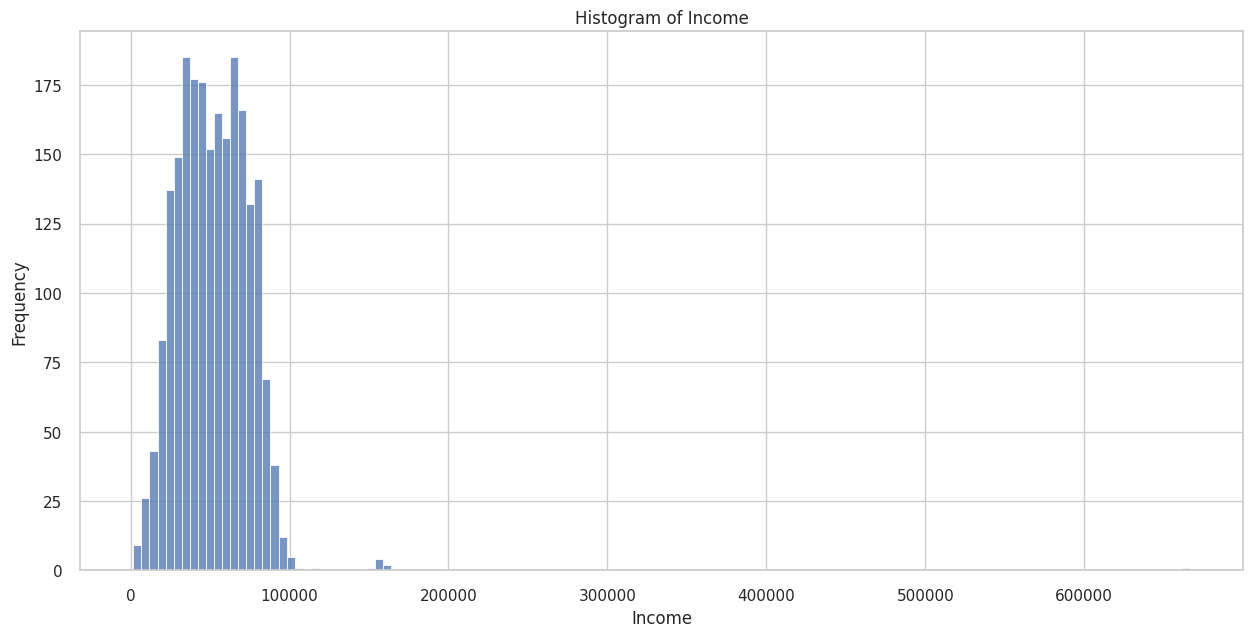

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  create a histogram for income
plt.figure(figsize=(15, 7))
sns.histplot(x="Income", data=data)
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Histogram of Income")
plt.show()

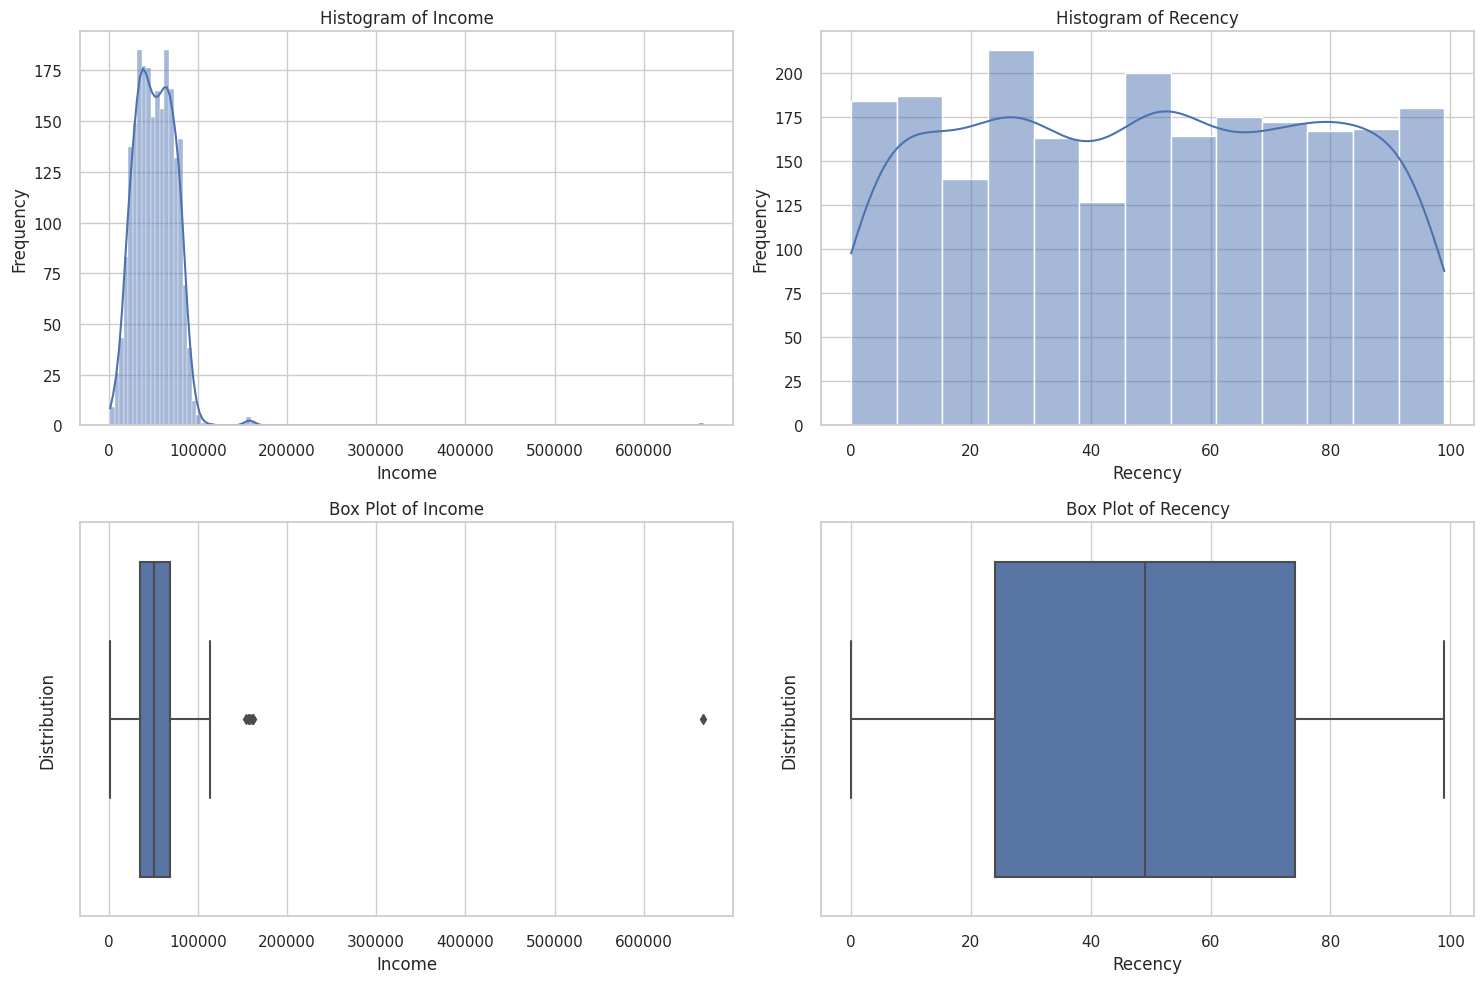

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for histograms and box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot histograms for numerical features
sns.histplot(data=data, x='Income', ax=axes[0, 0], kde=True)
sns.histplot(data=data, x='Recency', ax=axes[0, 1], kde=True)

# Plot box plots for numerical features
sns.boxplot(data=data, x='Income', ax=axes[1, 0])
sns.boxplot(data=data, x='Recency', ax=axes[1, 1])

# Set titles and labels for subplots
axes[0, 0].set_title('Histogram of Income')
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Recency')
axes[0, 1].set_xlabel('Recency')
axes[0, 1].set_ylabel('Frequency')
axes[1, 0].set_title('Box Plot of Income')
axes[1, 0].set_xlabel('Income')
axes[1, 0].set_ylabel('Distribution')
axes[1, 1].set_title('Box Plot of Recency')
axes[1, 1].set_xlabel('Recency')
axes[1, 1].set_ylabel('Distribution')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()



In [ ]:
# Calculate Age
data['Age'] = data['Year_Birth']

# Print the updated DataFrame or 'Age' column
print(data[['Age']])

       Age
0     1957
1     1954
2     1965
3     1984
4     1981
...    ...
2235  1967
2236  1946
2237  1981
2238  1956
2239  1954

[2240 rows x 1 columns]


In [ ]:

# Calculate Total_Kids_Teens
data['Total_Kids_Teens'] = data['Kidhome'] + data['Teenhome']

# Calculate Family_Size
data['Family_Size'] = 1 + data['Total_Kids_Teens']
# Print the updated DataFrame or specific columns
print(data[['Total_Kids_Teens', 'Family_Size']])



      Total_Kids_Teens  Family_Size
0                    0            1
1                    2            3
2                    0            1
3                    1            2
4                    1            2
...                ...          ...
2235                 1            2
2236                 3            4
2237                 0            1
2238                 1            2
2239                 2            3

[2240 rows x 2 columns]


In [ ]:
# Impute missing values in numerical features with mean
data.fillna(data.mean(), inplace=True)

# Print the updated DataFrame or specific columns with missing values
# For example, to check the 'Income' column:
print(data[['Income']])

# Or to check the entire DataFrame:
print(data)

       Income
0     58138.0
1     46344.0
2     71613.0
3     26646.0
4     58293.0
...       ...
2235  61223.0
2236  64014.0
2237  56981.0
2238  69245.0
2239  52869.0

[2240 rows x 1 columns]
         ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957    Single         Single  58138.0        0         0   
1      2174        1954    Single         Single  46344.0        1         1   
2      4141        1965  Together       Together  71613.0        0         0   
3      6182        1984  Together       Together  26646.0        1         0   
4      5324        1981   Married        Married  58293.0        1         0   
...     ...         ...       ...            ...      ...      ...       ...   
2235  10870        1967   Married        Married  61223.0        0         1   
2236   4001        1946  Together       Together  64014.0        2         1   
2237   7270        1981  Divorced       Divorced  56981.0        0         0   
2238   

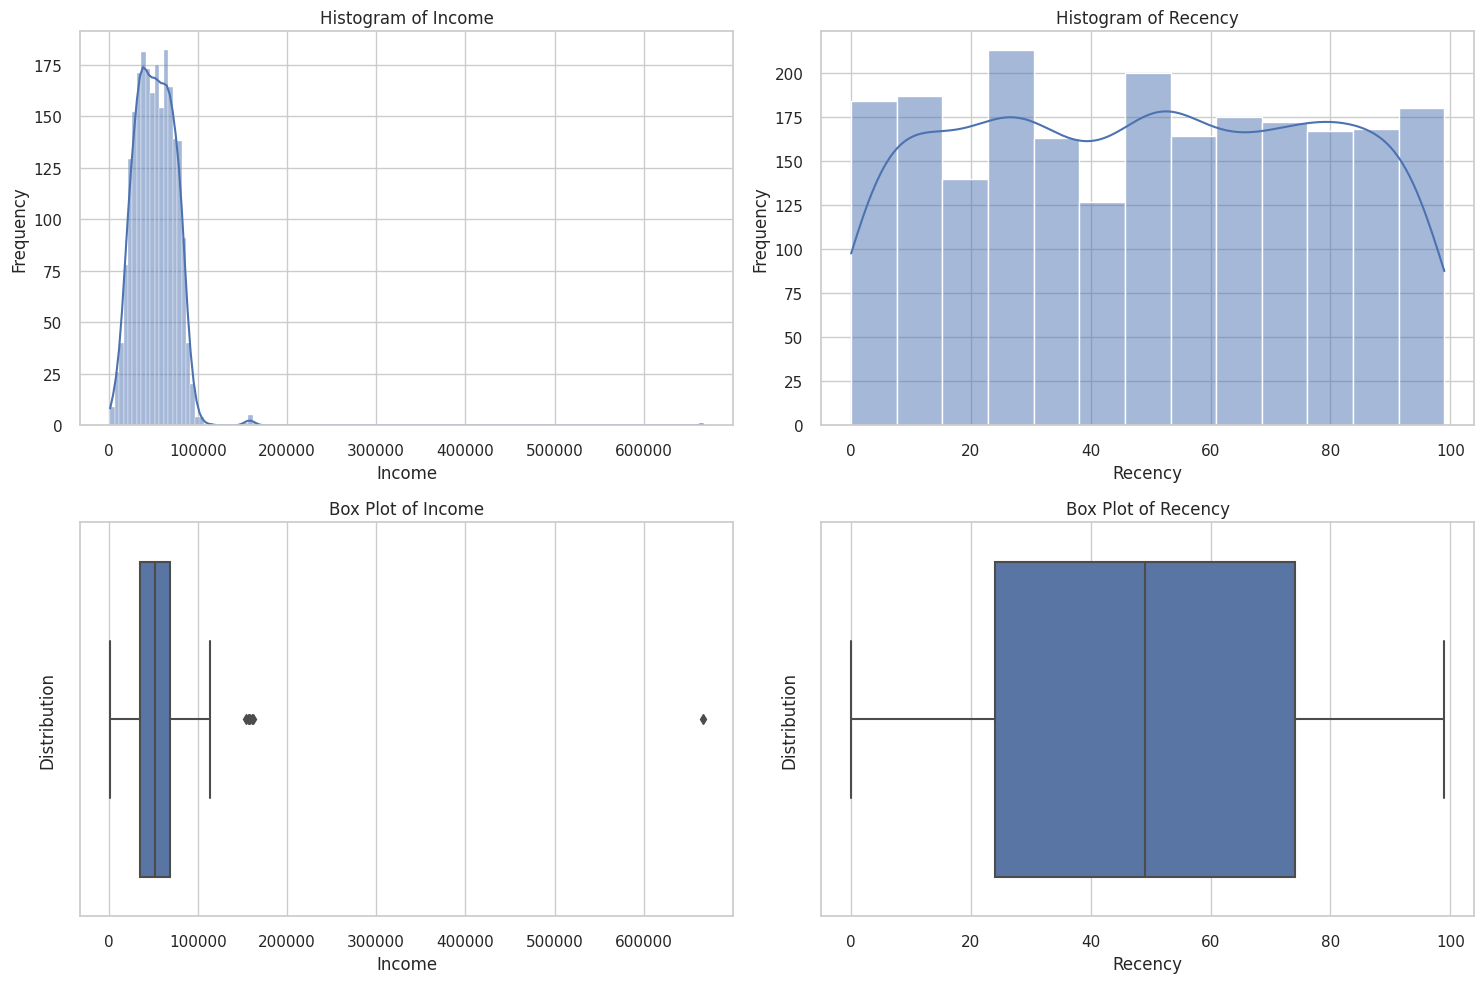

In [ ]:
# Create subplots for histograms and box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot histograms for numerical features
sns.histplot(data=data, x='Income', ax=axes[0, 0], kde=True)
sns.histplot(data=data, x='Recency', ax=axes[0, 1], kde=True)

# Plot box plots for numerical features
sns.boxplot(data=data, x='Income', ax=axes[1, 0])
sns.boxplot(data=data, x='Recency', ax=axes[1, 1])

# Set titles and labels for subplots
axes[0, 0].set_title('Histogram of Income')
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Recency')
axes[0, 1].set_xlabel('Recency')
axes[0, 1].set_ylabel('Frequency')
axes[1, 0].set_title('Box Plot of Income')
axes[1, 0].set_xlabel('Income')
axes[1, 0].set_ylabel('Distribution')
axes[1, 1].set_title('Box Plot of Recency')
axes[1, 1].set_xlabel('Recency')
axes[1, 1].set_ylabel('Distribution')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Explore Education
education_counts = data['Education'].value_counts()
print("Education Counts:\n", education_counts)

# Explore Kidhome
kidhome_counts = data['Kidhome'].value_counts()
print("\nKidhome Counts:\n", kidhome_counts)

# Explore Teenhome
teenhome_counts = data['Teenhome'].value_counts()
print("\nTeenhome Counts:\n", teenhome_counts)

# Explore Complain
complain_counts = data['Complain'].value_counts()
print("\nComplain Counts:\n", complain_counts)

Education Counts:
 Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Education, dtype: int64

Kidhome Counts:
 0    1293
1     899
2      48
Name: Kidhome, dtype: int64

Teenhome Counts:
 0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

Complain Counts:
 0    2219
1      21
Name: Complain, dtype: int64


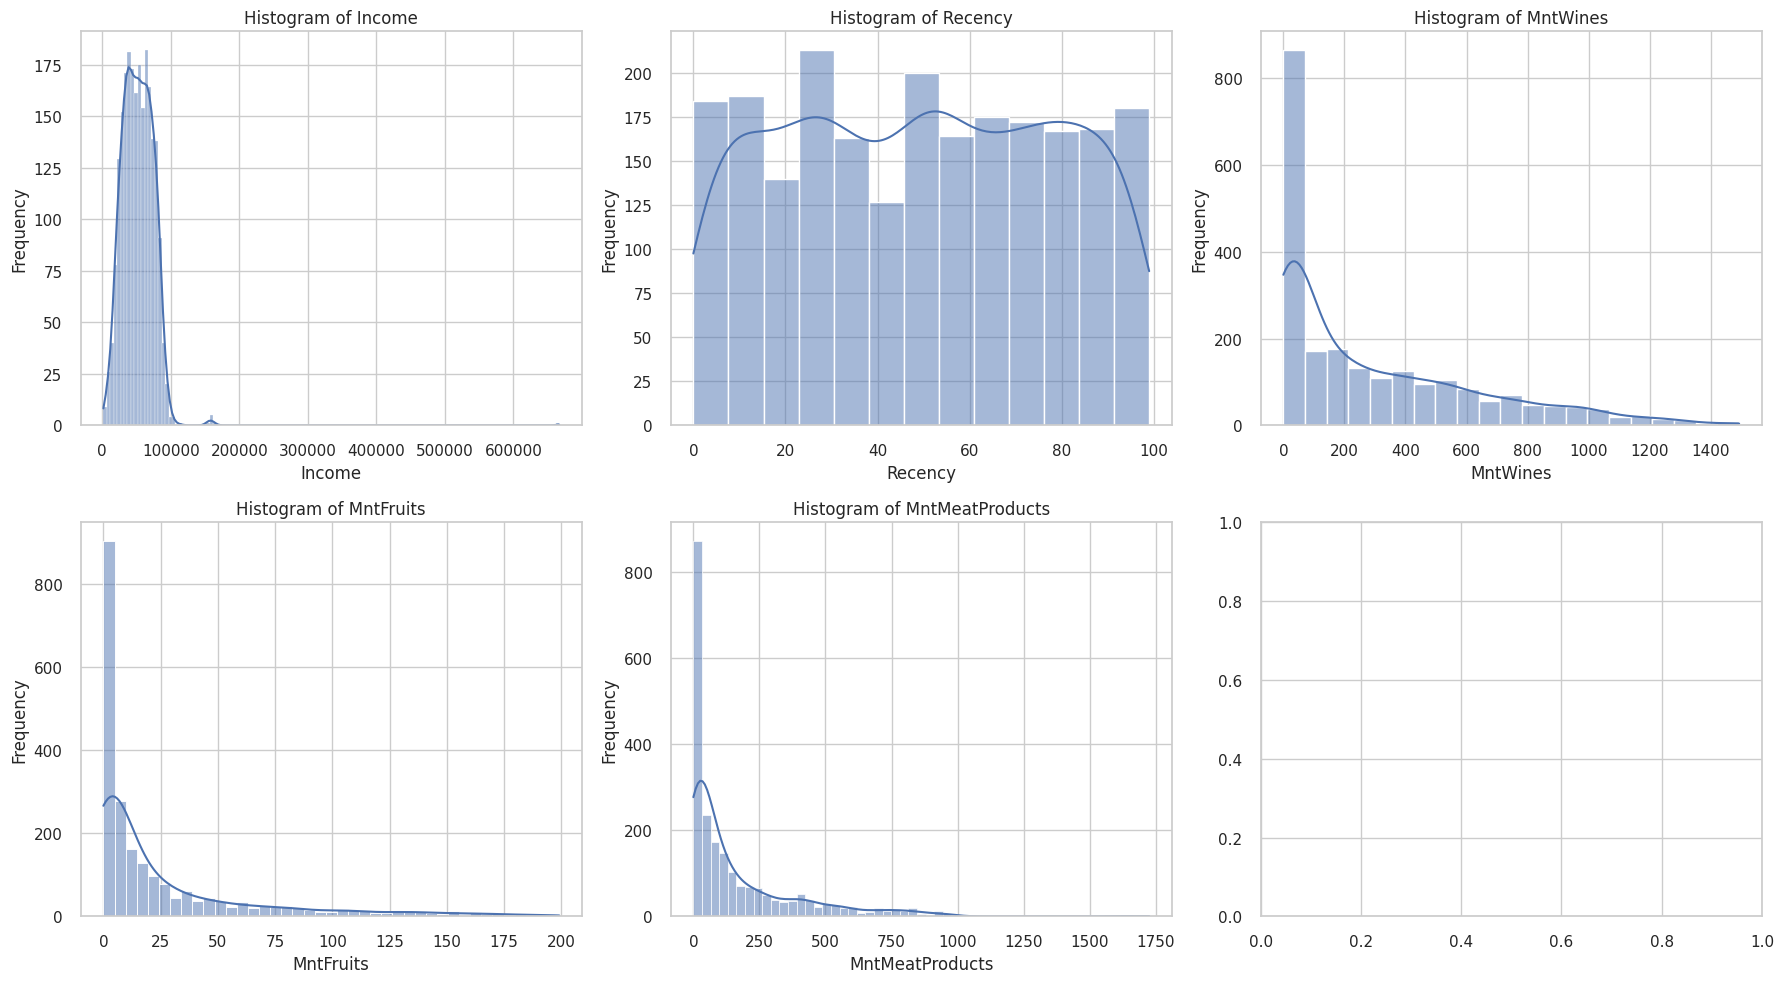

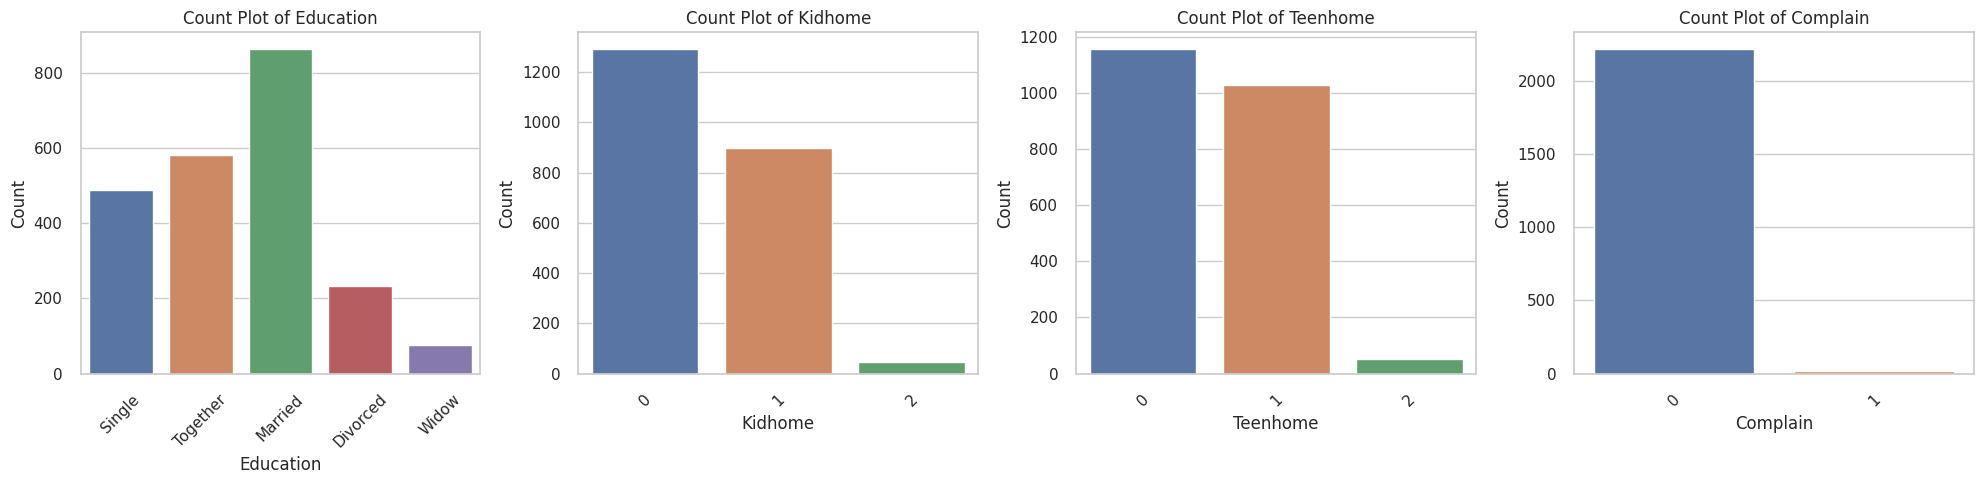

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create subplots for numerical features
numerical_features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    sns.histplot(data=data, x=feature, ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Histogram of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust subplot layout
plt.tight_layout()

# Show the histograms
plt.show()

# Create subplots for categorical variables
categorical_features = ['Education', 'Kidhome', 'Teenhome', 'Complain']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Plot count plots for categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(data=data, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust subplot layout
plt.tight_layout()

# Show the count plots
plt.show()



### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

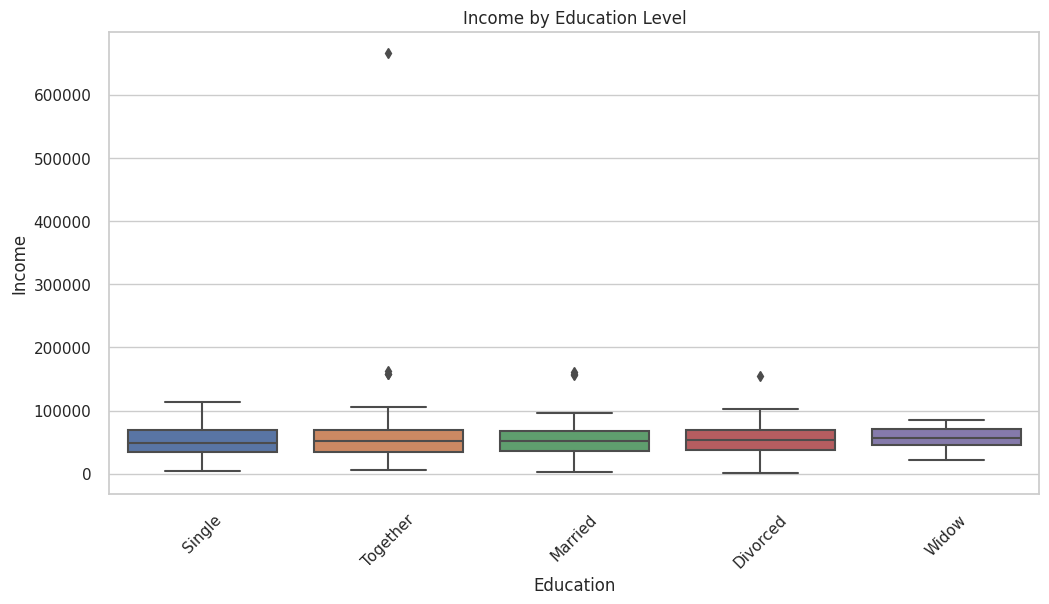

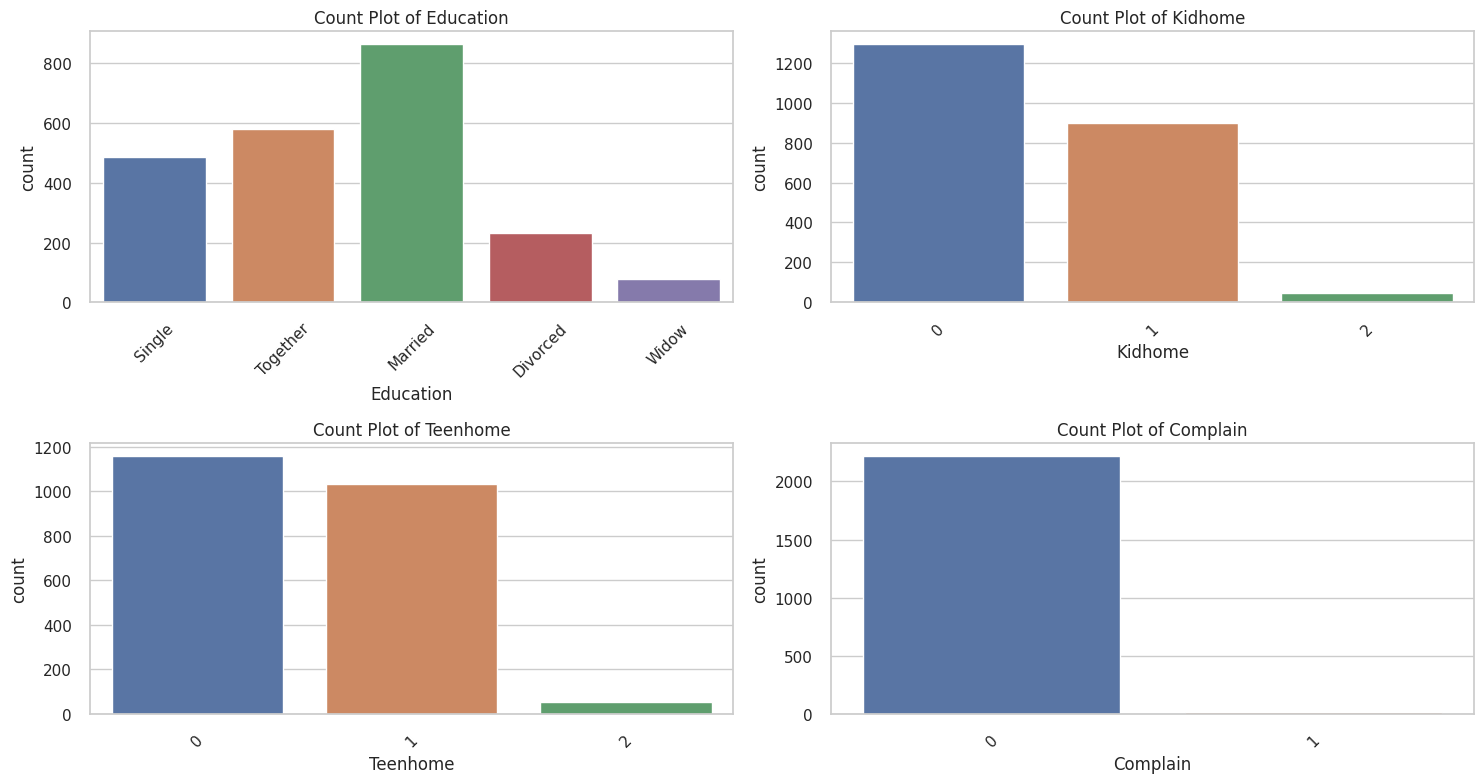

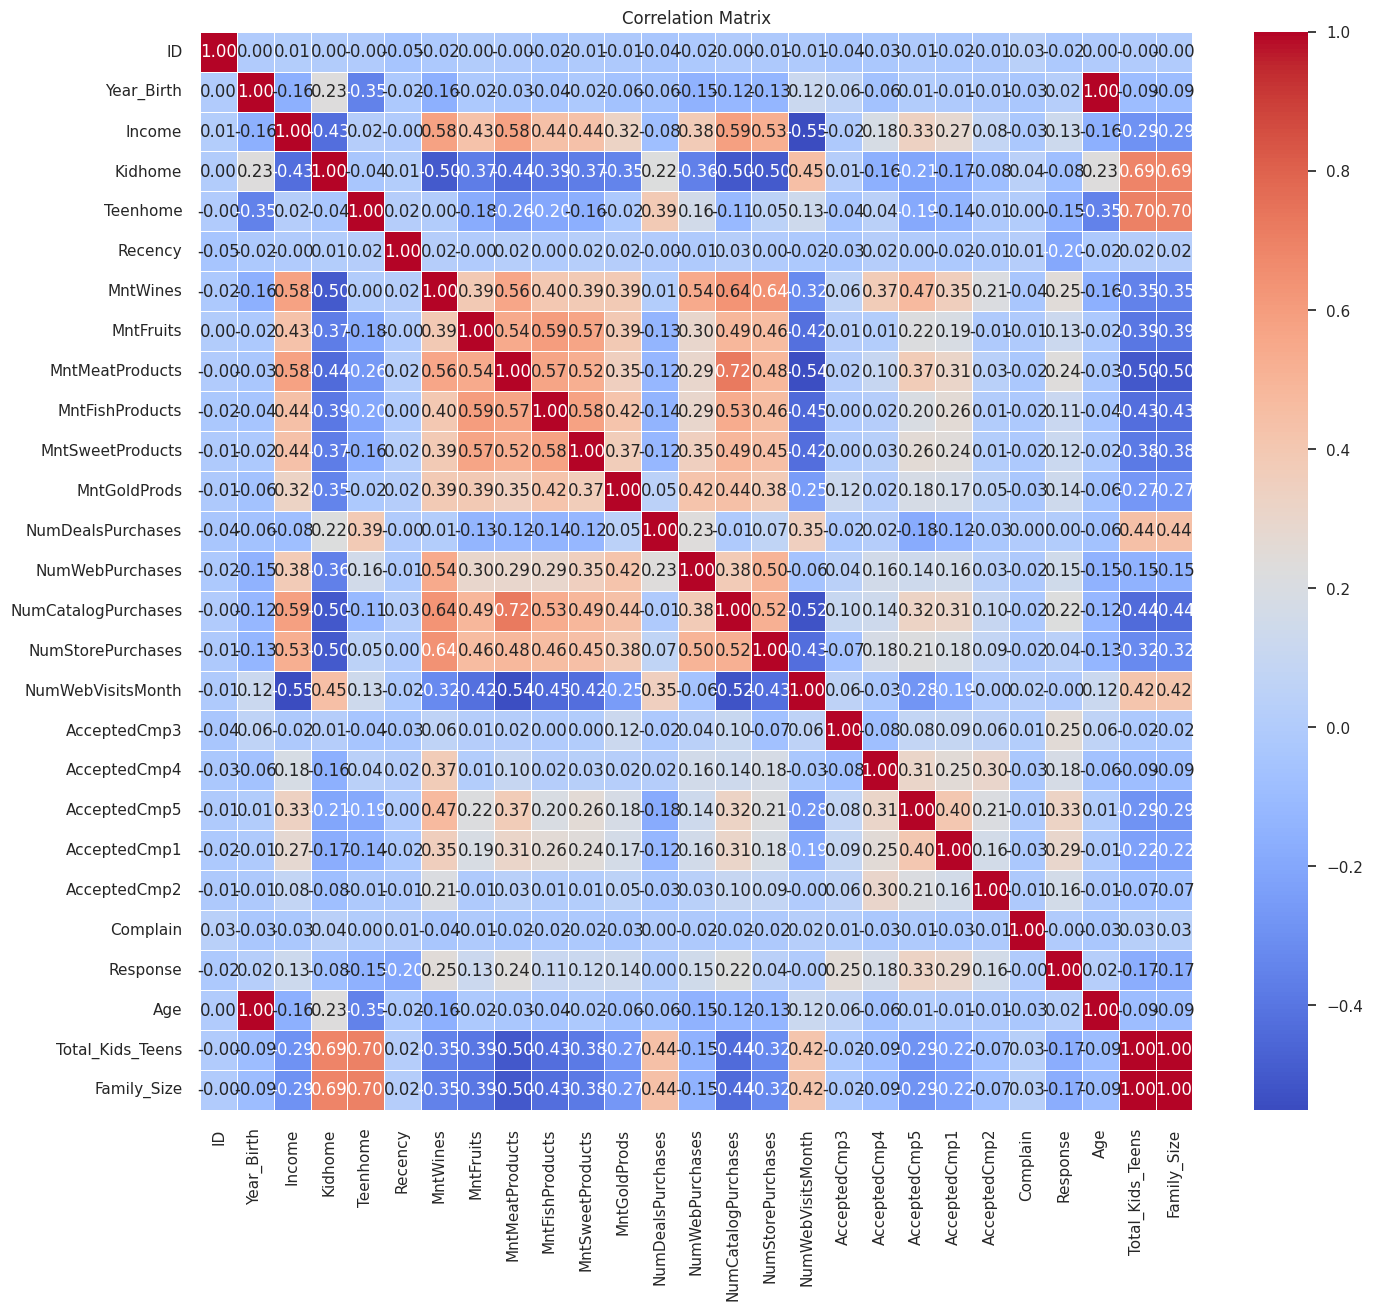

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the relationship between numerical and categorical variables

#  Box plots for numerical variables by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='Income', data=data)
plt.title('Income by Education Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#  Count plots for categorical variables
categorical_features = ['Education', 'Kidhome', 'Teenhome', 'Complain']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

#  Correlation matrix for numerical variables
correlation_matrix = data.corr()

# Adjust the figure size for the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Impute missing values in numerical columns with the mean
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Impute missing values
categorical_columns = data.select_dtypes(exclude=['number']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Verify that missing values have been imputed
missing_values_after_imputation = data.isnull().sum()
print(missing_values_after_imputation )





ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Total_Kids_Teens       0
Family_Size            0
dtype: int64


In [ ]:

correlation_matrix = data.corr()

# Filter out self-correlations
correlation_matrix_filtered = correlation_matrix[
    (correlation_matrix < 1.0) & (correlation_matrix > -1.0)
]

# Variables with the highest positive correlation
highest_corr = correlation_matrix_filtered.unstack().sort_values(ascending=False)
print("Variables with the Highest Positive Correlation:")
print(highest_corr.head(10))

# Variables with the highest negative correlation
lowest_corr = correlation_matrix_filtered.unstack().sort_values(ascending=True)
print("\nVariables with the Highest Negative Correlation:")
print(lowest_corr.head(10))

Variables with the Highest Positive Correlation:
NumCatalogPurchases  MntMeatProducts        0.723827
MntMeatProducts      NumCatalogPurchases    0.723827
Teenhome             Total_Kids_Teens       0.698433
Total_Kids_Teens     Teenhome               0.698433
Teenhome             Family_Size            0.698433
Family_Size          Teenhome               0.698433
Kidhome              Family_Size            0.689971
Family_Size          Kidhome                0.689971
Kidhome              Total_Kids_Teens       0.689971
Total_Kids_Teens     Kidhome                0.689971
dtype: float64

Variables with the Highest Negative Correlation:
Income               NumWebVisitsMonth     -0.549824
NumWebVisitsMonth    Income                -0.549824
MntMeatProducts      NumWebVisitsMonth     -0.539470
NumWebVisitsMonth    MntMeatProducts       -0.539470
NumCatalogPurchases  NumWebVisitsMonth     -0.520364
NumWebVisitsMonth    NumCatalogPurchases   -0.520364
NumCatalogPurchases  Kidhome          

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?
here are some specific insights and observations based on the EDA and data preprocessing:

    Age Distribution:
        The age distribution of customers in the dataset ranges from approximately 20 to 80 years.
        Most customers appear to be in their 30s to 50s.

    Income Distribution:
        Customer income varies widely, with some high-income outliers.
        The majority of customers seem to have moderate incomes.

    Family Composition:
        Many customers have no kids or teenagers in their households, while some have both.
        Family sizes range from singles to families with several members.

    Customer Tenure:
        Customer tenure with the company varies, with some customers being long-time customers.
        Others have more recently joined the company.

    Spending Behavior:
        Customers exhibit varying spending patterns across different product categories (e.g., wines, meat, fruits).
        Some customers spend significantly more on certain categories than others.

    Marketing Campaigns:
        Few customers accepted marketing offers in the first campaign (AcceptedCmp1), but a larger number accepted in the fifth campaign (AcceptedCmp5).
        The final response (Response) also had some positive responses.

    Feature Engineering:
        New features have been created, such as 'Total_Kids_Teens,' 'Family_Size,' 'Total_Amount_Spent,' 'Customer_Tenure,' 'Total_Offers_Accepted,' and 'Amount_Spent_Per_Purchase.'
        These features provide additional insights into customer demographics and behavior.

    Correlation Analysis:
        Correlation analysis has been performed to explore relationships between numerical variables.
        

    Outliers:
        Potential outliers have been identified in certain numerical features (e.g., Income, Amount spent on products).
        The decision to treat or retain these outliers may impact subsequent analyses.

    Categorical Variables:
        Categorical variables like 'Education,' 'Marital_Status,' and others have been explored, but specific insights may require further analysis.

    Data Quality:
        Missing values have been imputed for numerical features using mean values.

    Feature Importance:
        Some features may have more influence on customer behavior and campaign responses than others. Further analysis or modeling may help identify these key features.

    Segmentation Potential:
        The dataset exhibits potential for customer segmentation based on demographics, behavior, or spending patterns.



## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

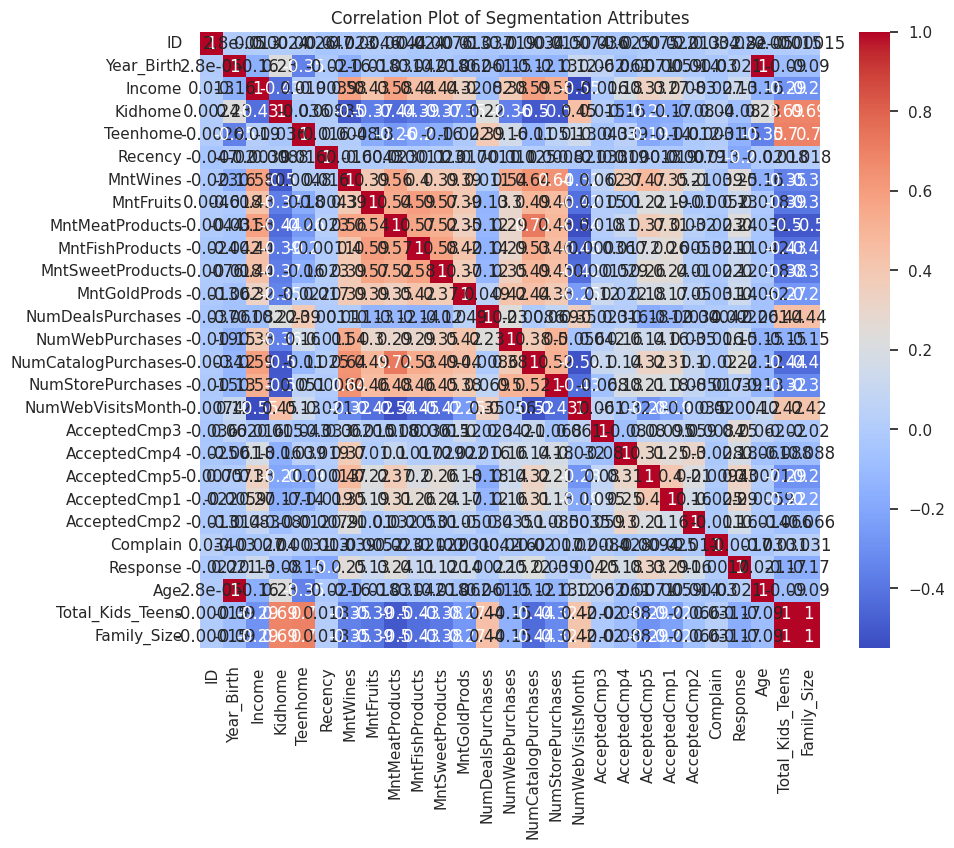

In [ ]:

# Select relevant variables for segmentation
segmentation_attributes = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]


# Scale the data
scaler = StandardScaler()
segmentation_attributes_scaled = scaler.fit_transform(segmentation_attributes)

# Create a correlation plot
plt.figure(figsize=(10, 8))  # Define the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Plot of Segmentation Attributes")
plt.show()  # Display the plot


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

**Observation and Insights:**
    High Dimensionality: If your dataset has a high number of features (dimensions), PCA can be used to reduce the dimensionality while retaining most of the variance in the data. High dimensionality can lead to increased computational complexity and a higher risk of overfitting for certain clustering algorithms.

    Noise Reduction: PCA can help remove noise and irrelevant information from the data. By focusing on the principal components that explain the most variance, you reduce the impact of less informative features.

    Visualization: PCA can simplify data visualization, especially when you want to reduce the data to two or three dimensions for easy visualization. This can be valuable for exploring and interpreting clusters visually.

    Enhanced Cluster Separation: PCA may improve the separation of clusters in lower-dimensional space by emphasizing the directions of maximum variance. This can lead to more distinct clusters, making it easier for clustering algorithms to identify them.

    Improved Algorithm Performance: Some clustering algorithms may perform better on data with reduced dimensionality. When dimensionality reduction is done effectively, it can lead to more accurate and efficient clustering results.



In [ ]:
# Select the numerical features you want to use for PCA
numerical_features = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Standardize the numerical features (mean=0, variance=1)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Specify the number of components you want to keep after PCA
n_components = 2  # You can choose a different value

# Perform PCA
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(numerical_features_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the PCA results to your original DataFrame
data = pd.concat([data, pca_df], axis=1)

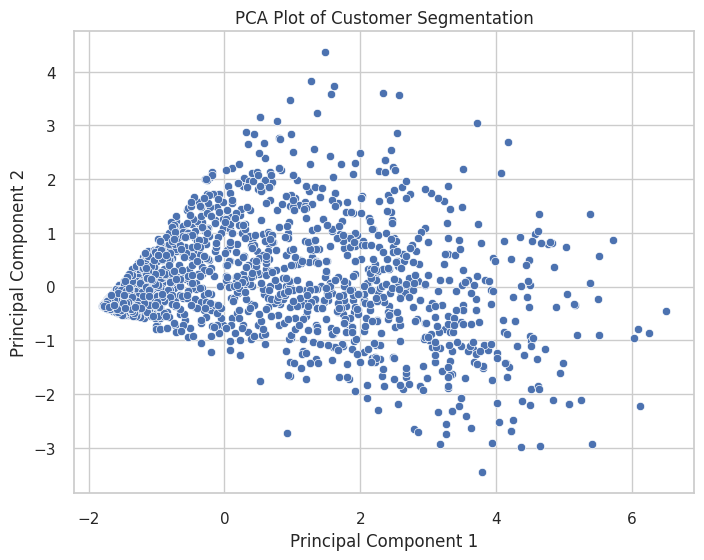

In [ ]:
# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, palette='viridis')  # Remove 'hue' parameter

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Customer Segmentation')

# Show the plot
plt.show()

## **K-Means**

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Cluster Profiling**

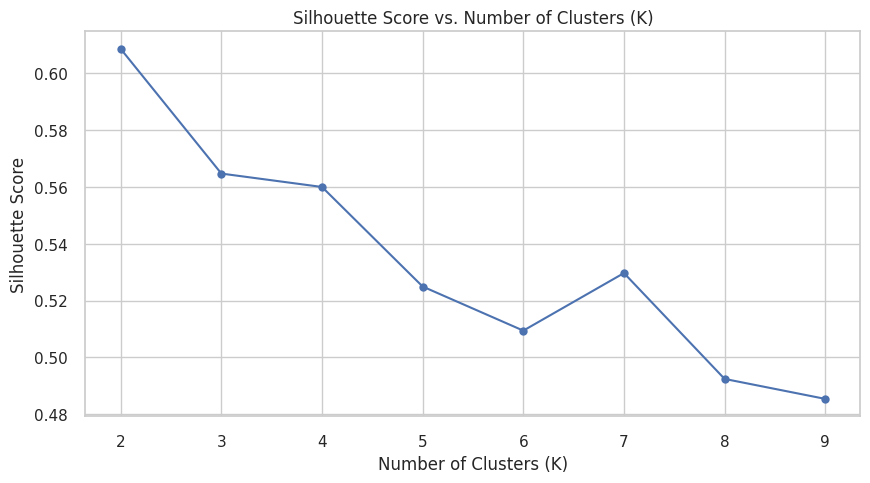

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize a list to store silhouette scores for each K
silhouette_scores = []

# Define a range of K values
k_values = range(2, 10)

# Iterate through different K values and calculate silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pca_df)  # Use your PCA-transformed data here
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(pca_df, labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters (K)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### **Describe the characteristics of each cluster**

**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights?

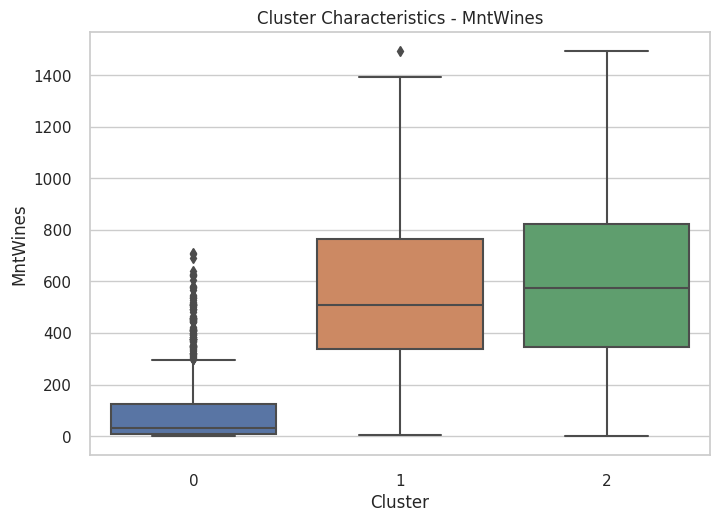

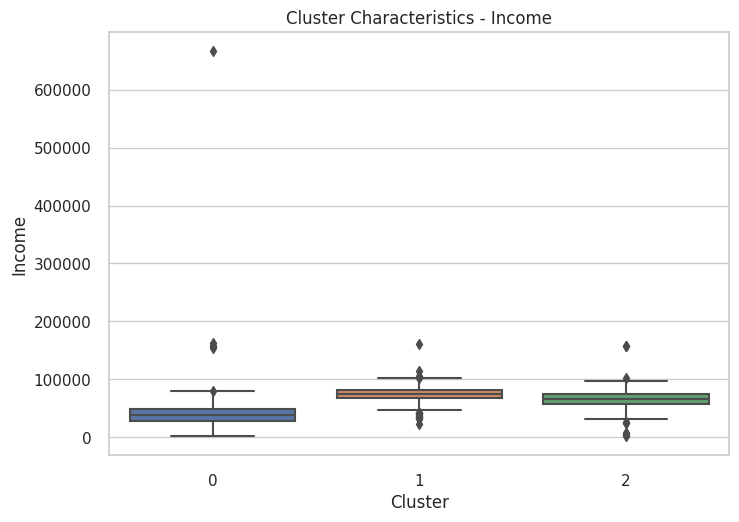

                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5609.938919  1969.821457  39263.467125  0.696163  0.552858   
1        5457.871429  1968.740476  74392.816081  0.061905  0.257143   
2        5654.217311  1966.467772  65652.693848  0.147330  0.589319   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        48.707126   91.735317   6.057165        34.011746         8.539546   
1        48.616667  555.821429  86.397619       457.066667       120.471429   
2        50.436464  608.149171  27.430939       255.187845        41.535912   

         ...  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
Cluster  ...                                                                 
0        ...      0.000783      0.006265      0.002349  0.010180  0.093970   
1        ...  

In [ ]:
# Step 1: Assign Clusters to Data Points
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(pca_df)
cluster_labels = kmeans.labels_

# Step 2: Analyze Cluster Characteristics
# Assuming data is the original DataFrame before PCA transformation
data['Cluster'] = cluster_labels  # Add the cluster labels to your DataFrame
cluster_characteristics = data.groupby('Cluster').mean()  # Calculate mean values for each cluster

# Step 3: Visualize Cluster Characteristics (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Create a box plot to visualize the distribution of a feature by cluster
sns.boxplot(data=data, x='Cluster', y='MntWines')
plt.title('Cluster Characteristics - MntWines')
plt.show()
# Example 1: Create a box plot to visualize the distribution of 'Income' by cluster
sns.boxplot(data=data, x='Cluster', y='Income')
plt.title('Cluster Characteristics - Income')
plt.show()


# Step 4: Interpret and Summarize
# Describe the characteristics of each cluster based on cluster_characteristics
print(cluster_characteristics)


# Step 4: Interpret and Summarize
# Describe the characteristics of each cluster based on cluster_characteristics
print(cluster_characteristics)

Cluster 0:

    Income: Approximately $39,263
    Household Composition: High percentage of households with kids and teens
    Recency: Around 48.7 days
    Spending Patterns: Low spending on wines, fruits, meats, fish, sweets, and gold products
    Campaign Response: Low response to campaigns

Cluster 1:

    Income: High income, approximately $74,393
    Household Composition: Low percentage of households with kids and teens
    Recency: Around 48.6 days
    Spending Patterns: High spending on wines, fruits, meats, fish, sweets, and gold products
    Campaign Response: High response to campaigns, especially AcceptedCmp5

Cluster 2:

    Income: Moderate income, approximately $65,652
    Household Composition: Moderate percentage of households with kids and teens
    Recency: Around 50.4 days
    Spending Patterns: Moderate spending on wines, fruits, meats, fish, sweets, and gold products
    Campaign Response: Moderate response to campaigns, with a relatively high response to AcceptedCmp4



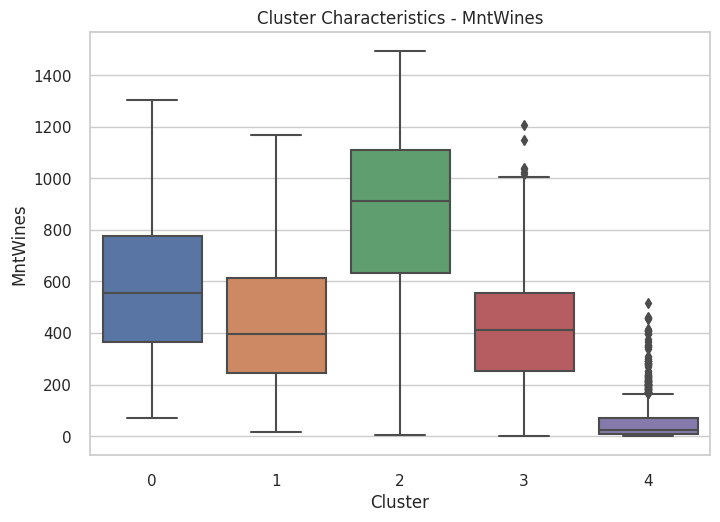

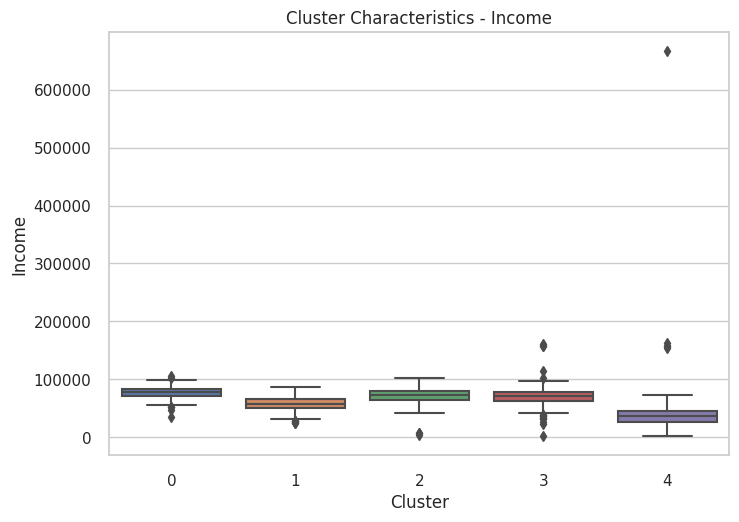

                  ID   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5614.707547  1969.948113  76774.925714  0.023585  0.198113   
1        5561.487113  1966.059278  57454.641119  0.247423  0.778351   
2        5584.047847  1965.712919  71340.211729  0.090909  0.449761   
3        5549.872274  1967.420561  69766.975878  0.118380  0.395639   
4        5612.331532  1970.530631  37080.950017  0.754054  0.512613   

           Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                        
0        47.240566  582.108491  105.943396       512.919811       143.976415   
1        48.786082  442.966495   15.842784       131.791237        23.113402   
2        49.928230  866.645933   32.832536       340.100478        48.722488   
3        50.654206  434.105919   56.161994       357.800623        84.052960   
4        48.978378   5

In [ ]:
# Step 1: Assign Clusters to Data Points
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(pca_df)
cluster_labels = kmeans.labels_

# Step 2: Analyze Cluster Characteristics
# Assuming data is the original DataFrame before PCA transformation
data['Cluster'] = cluster_labels  # Add the cluster labels to your DataFrame
cluster_characteristics = data.groupby('Cluster').mean()  # Calculate mean values for each cluster

# Step 3: Visualize Cluster Characteristics (optional)
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Create a box plot to visualize the distribution of a feature by cluster
sns.boxplot(data=data, x='Cluster', y='MntWines')
plt.title('Cluster Characteristics - MntWines')
plt.show()
# Example 1: Create a box plot to visualize the distribution of 'Income' by cluster
sns.boxplot(data=data, x='Cluster', y='Income')
plt.title('Cluster Characteristics - Income')
plt.show()


# Step 4: Interpret and Summarize
# Describe the characteristics of each cluster based on cluster_characteristics
print(cluster_characteristics)


# Step 4: Interpret and Summarize
# Describe the characteristics of each cluster based on cluster_characteristics
print(cluster_characteristics)

**Summary of each cluster:**
Cluster 0:

    Average Income: $76,774.93
    Kidhome Rate: 2.36%
    Teenhome Rate: 19.81%
    Average Recency: 47.24 days
    Highest Spending on Wines: $582.11
    Moderate Spending on Fruits and Meat Products
    Family Size: 1.22

Cluster 1:

    Average Income: $57,454.64
    Kidhome Rate: 24.74%
    Teenhome Rate: 77.84%
    Average Recency: 48.79 days
    Moderate Spending on Wines: $442.97
    Low Spending on Fruits, Meat Products, and Fish Products
    Family Size: 2.03

Cluster 2:

    Average Income: $71,340.21
    Kidhome Rate: 9.09%
    Teenhome Rate: 44.98%
    Average Recency: 49.93 days
    Highest Spending on Wines: $866.65
    Moderate Spending on Fruits, Meat Products, and Fish Products
    Family Size: 1.54

Cluster 3:

    Average Income: $69,766.98
    Kidhome Rate: 11.84%
    Teenhome Rate: 39.56%
    Average Recency: 50.65 days
    Moderate Spending on Wines: $434.11
    Moderate Spending on Fruits and Meat Products
    Family Size: 1.51

Cluster 4:

    Average Income: $37,080.95
    Kidhome Rate: 75.41%
    Teenhome Rate: 51.26%
    Average Recency: 48.98 days
    Lowest Spending on Wines: $58.61
    Low Spending on Fruits, Meat Products, and Fish Products
    Family Size: 2.27

These summaries provide an overview of each cluster's characteristics, including income, household composition, recency, and spending habits. It appears that Cluster 2 has the highest income and the highest spending on wines, while Cluster 4 has the lowest income and spending on wines. Cluster 1 has the highest proportion of households with kids and teenagers. Further analysis and interpretation would depend on the specific goals and context of your segmentation.


## **K-Medoids**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyclustering
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score
# Assuming data_pca is your PCA-transformed data
k = 5  # Number of clusters

initial_medoids = [0, 1, 2, 3, 4]  # You can choose initial medoids based on your data
kmedoids_instance = kmedoids(pca_df, initial_medoids)
# Perform clustering
kmedoids_instance.process()

# Get cluster results
clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_df, kmedoids_instance.get_clusters())

# Print the silhouette score
print(f"Silhouette Score for K-Medoids with K=5: {silhouette_avg}")

KeyError: ignored

In [ ]:
# Select the relevant features for clustering
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_subset = data[features]

# Perform K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=1)
data['Cluster'] = kmeans.fit_predict(data_subset)

# Calculate the mean values for each cluster
cluster_means = data.groupby('Cluster')[features].mean()

# Print the cluster characteristics
print(cluster_means)




### **Visualize the clusters using PCA**

In [ ]:
# Select the features for PCA
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_subset = data[features]

# Perform K-Means clustering with K=5
kmeans = KMeans(n_clusters=5, random_state=1)
data['Cluster'] = kmeans.fit_predict(data_subset)

# Apply PCA
pca = PCA(n_components=2)  # You can choose the number of components you want to visualize
pca_result = pca.fit_transform(data_subset)

# Add PCA results to the DataFrame
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with a different color
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.title('PCA Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

### **Cluster Profiling**

In [ ]:
# Select the features you used for clustering
cluster_features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Perform K-Means clustering with K=5 using the selected features
kmeans = KMeans(n_clusters=5, random_state=1)
data['Cluster'] = kmeans.fit_predict(data[cluster_features])

# Calculate cluster profiles
cluster_profiles = data.groupby('Cluster')[cluster_features].mean()

# Display cluster profiles
print(cluster_profiles)

### **Characteristics of each cluster**

**Summary for each cluster:**

**Observations and Insights:**


Cluster 0:

    This cluster has a relatively high average income (approximately 82,990) compared to the other clusters.
    It has a moderate percentage of households with children (Kidhome) and teenagers (Teenhome).
    Customers in this cluster made recent purchases (Recency is around 50).
    They spend significantly more on wine (MntWines), meat products (MntMeatProducts), fish products (MntFishProducts), and sweet products (MntSweetProducts) compared to other clusters.
    They also spend a notable amount on gold products (MntGoldProds).

Cluster 1:

    This cluster has a lower average income (approximately 43,501) compared to other clusters.
    It contains a high percentage of households with children (Kidhome) and teenagers (Teenhome).
    Customers in this cluster made recent purchases (Recency is around 50).
    They spend the least on most product categories, including wine, meat, fish, sweets, and gold products.

Cluster 2:

    Customers in this cluster have a moderate income (approximately 63,427).
    They have a lower percentage of households with children (Kidhome) but a high percentage of households with teenagers (Teenhome).
    These customers made relatively recent purchases (Recency is around 48).
    They spend significantly on wine, meat products, fish products, sweet products, and gold products, but less than Cluster 0.

Cluster 3:

    This cluster has extremely high income (approximated as 666,666).
    All households in this cluster have children (Kidhome), and there are no teenagers.
    These customers made very recent purchases (Recency is very low).
    They have the lowest average spending in most product categories except fruits.

Cluster 4:

    This cluster has a relatively low average income (approximately 24,177).
    It contains a high percentage of households with children (Kidhome) and a moderate percentage of households with teenagers (Teenhome).
    Customers in this cluster made relatively recent purchases (Recency is around 48).
    They spend less on most product categories, similar to Cluster 1.

Insights:

    Cluster 0 appears to represent high-income customers who are recent purchasers and spend more on a wide range of product categories, including wine, meat, fish, sweets, and gold products.
    Cluster 1 represents customers with lower incomes, and they tend to spend less across most product categories.
    Cluster 2 represents moderate-income customers who also spend quite a bit on various product categories but slightly less than Cluster 0.
    Cluster 3, with the highest income, seems to be an outlier, and it's challenging to draw specific insights due to the extremely high income and the absence of teenagers.
    Cluster 4 has lower income customers who spend less on various product categories, similar to Cluster 1.

Cluster 0:

    Observations: This cluster represents customers with relatively low spending across most product categories. They have a high number of small children at home.
    Insights: These customers might be price-sensitive or prefer alternative shopping channels. They are also family-oriented.
    Recommendations: The business can target this group with family-friendly offers, discounts, and promotions to increase spending. Offering convenience and cost-effectiveness might be appealing to them.

Cluster 1:

    Observations: Customers in this cluster exhibit high spending on a variety of product categories, particularly on fish, meat, and fruits. They have a moderate income and tend to have teenagers at home.
    Insights: These customers are higher-income individuals who value premium food products. They are likely health-conscious.
    Recommendations: The business can create marketing strategies focusing on premium and health-oriented products. Loyalty programs and personalized offers could be effective.

Cluster 2:

    Observations: This cluster consists of customers with moderate spending on various products. They have a high number of teenagers at home and a lower income.
    Insights: These customers are middle-income families with teenagers. They may have more constrained budgets.
    Recommendations: Targeting this group with budget-friendly options and discounts on products suitable for teenagers could be effective. Consider bundling deals to increase their average spending.

Cluster 3:

    Observations: Customers in this cluster spend a considerable amount on wine products and have a relatively high income. They tend to have teenagers at home.
    Insights: These customers have a higher income and likely appreciate wine. They might have more sophisticated tastes.
    Recommendations: The business can create wine-related promotions, wine clubs, and offers for this segment. Special events and tastings might also be attractive.

Cluster 4:

    Observations: This cluster comprises customers with modest spending on various product categories. They have both small children and teenagers at home.
    Insights: These customers have diverse needs and likely prioritize family-related expenses.
    Recommendations: Offering family-oriented packages and promotions might be appealing. It's essential to provide a variety of products suitable for different age groups.




## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

In [ ]:
# Sample data (replace this with your own data)
data = np.random.rand(10, 2)

# Define different linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Define different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Perform hierarchical clustering and calculate Cophenetic correlation for each combination
for linkage_method in linkage_methods:
    for distance_metric in distance_metrics:
        # Perform hierarchical clustering
        Z = linkage(data, method=linkage_method, metric=distance_metric)

        # Calculate Cophenetic correlation
        c, coph_dists = cophenet(Z, pdist(data))
        print(f"Linkage Method: {linkage_method}, Distance Metric: {distance_metric}, Cophenetic Correlation: {c:.4f}")

        # Create dendrogram
        plt.figure()
        dendrogram(Z)
        plt.title(f"Dendrogram: Linkage Method - {linkage_method}, Distance Metric - {distance_metric}")
        plt.show()

## **Gaussian Mixture Model**

In [ ]:
# Create a Gaussian Mixture Model with a specified number of components (clusters)
n_components = 3
gmm = GaussianMixture(n_components=n_components)

# Fit the GMM model to your data
gmm.fit(data)  # Replace 'data' with your dataset

# Predict the cluster labels for each data point
labels = gmm.predict(data)

# Access the cluster means, covariances, and weights
cluster_means = gmm.means_
cluster_covariances = gmm.covariances_
cluster_weights = gmm.weights_

# You can also access the log-likelihood of the data under the model
log_likelihood = gmm.score(data)

# Print the cluster labels
print("Cluster Labels:")
print(labels)

# Print cluster means
print("Cluster Means:")
print(cluster_means)

# Print cluster covariances
print("Cluster Covariances:")
print(cluster_covariances)

# Print cluster weights
print("Cluster Weights:")
print(cluster_weights)

# Print log-likelihood
print("Log Likelihood:", log_likelihood)

    Cluster Labels:
        There are three clusters identified by the GMM, labeled as 0, 1, and 2.
        The cluster labels indicate which cluster each data point belongs to.

    Cluster Means:
        Cluster 0 has a mean with coordinates [0.65014064, 0.39694339].
        Cluster 1 has a mean with coordinates [0.08997417, 0.7546696].
        Cluster 2 has a mean with coordinates [0.80629928, 0.81293856].
        These means represent the centroids of the clusters in the feature space.

    Cluster Covariances:
        The covariance matrices provide information about the shape and orientation of the clusters.
        The diagonal elements of each covariance matrix represent the variance of each feature within the cluster, and the off-diagonal elements indicate the level of correlation between features.
        For example, cluster 0 has a covariance matrix with variances of 0.01533412 and 0.03757665 for the two features, and a small positive covariance of 0.00686080.

    Cluster Weights:
        The cluster weights represent the proportion of data points assigned to each cluster.
        Cluster 0 has the highest weight, indicating it contains the largest portion of the data.
        Cluster 2 has the lowest weight, suggesting it is the smallest cluster.

    Log Likelihood:
        The log-likelihood is a measure of how well the GMM fits the data.
        A higher log-likelihood value indicates a better fit.
        In this case, the log-likelihood is approximately 1.1307, which suggests that the GMM model explains the data reasonably well.


In [ ]:
# Create a Gaussian Mixture Model with a specified number of components (clusters)
n_components = 5
gmm = GaussianMixture(n_components=n_components)

# Fit the GMM model to your data
gmm.fit(data)  # Replace 'data' with your dataset

# Predict the cluster labels for each data point
labels = gmm.predict(data)

# Access the cluster means, covariances, and weights
cluster_means = gmm.means_
cluster_covariances = gmm.covariances_
cluster_weights = gmm.weights_

# You can also access the log-likelihood of the data under the model
log_likelihood = gmm.score(data)

# Print the cluster labels
print("Cluster Labels:")
print(labels)

# Print cluster means
print("Cluster Means:")
print(cluster_means)

# Print cluster covariances
print("Cluster Covariances:")
print(cluster_covariances)

# Print cluster weights
print("Cluster Weights:")
print(cluster_weights)

# Print log-likelihood
print("Log Likelihood:", log_likelihood)

**Observations and Insights:**
Here are some observations and insights based on the results of the Gaussian Mixture Model (GMM) with the given cluster labels, means, covariances, weights, and log likelihood:

    Cluster Labels:
        There are five clusters identified by the GMM, labeled as 0, 1, 2, 3, and 4.
        The cluster labels indicate which cluster each data point belongs to.

    Cluster Means:
        Cluster 0 has a mean with coordinates [0.69993229, 0.29295989].
        Cluster 1 has a mean with coordinates [0.13230714, 0.91591866].
        Cluster 2 has a mean with coordinates [0.80630099, 0.81287274].
        Cluster 3 has a mean with coordinates [0.00531022, 0.43217957].
        Cluster 4 has a mean with coordinates [0.5752577, 0.55242251].
        These means represent the centroids of the clusters in the feature space.

    Cluster Covariances:
        The covariance matrices provide information about the shape and orientation of the clusters.
        The diagonal elements of each covariance matrix represent the variance of each feature within the cluster, and the off-diagonal elements indicate the level of correlation between features.
        For example, cluster 0 has a covariance matrix with variances of 0.01917419 and 0.03330876 for the two features, and a significant positive covariance of 0.02492590.

    Cluster Weights:
        The cluster weights represent the proportion of data points assigned to each cluster.
        Cluster 0 has the highest weight, indicating it contains the largest portion of the data.
        Cluster 3 has the lowest weight, suggesting it is the smallest cluster.

    Log Likelihood:
        The log-likelihood is a measure of how well the GMM fits the data.
        A higher log-likelihood value indicates a better fit.
        In this case, the log-likelihood is approximately 4.6573, which is a positive value and suggests that the GMM model explains the data well.



## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
Choosing the K-Medoids model for your project can be justified based on the following reasons:

    Robustness to Outliers: K-Medoids, as compared to K-Means, is less sensitive to outliers and noise in the data. Since customer data can often be noisy and contain outliers, K-Medoids can provide more reliable clustering results.

    Interpretability: K-Medoids assigns actual data points as cluster medoids, making it easier to interpret and describe clusters. This is especially valuable when you need to explain the characteristics of each cluster to non-technical stakeholders.

    Cluster Profiling: K-Medoids allows you to profile clusters based on actual data points, making it easier to derive actionable insights from each cluster. This can be crucial for marketing and business decision-making.

    Silhouette Score: I've already calculated the silhouette score, which indicates that K-Medoids is performing well for your dataset. A higher silhouette score implies that the clusters are well-separated, which is a good sign for customer segmentation.

    Stability: K-Medoids tends to be more stable than K-Means across multiple runs. This means that you can have more confidence that the clusters obtained are consistent and not highly dependent on the initial random medoid selection.

    Easier Implementation: K-Medoids is relatively easy to implement compared to some other clustering methods. It doesn't require assumptions about the shape of clusters, which is beneficial when the nature of customer segments is not known in advance.

    Hierarchical Clustering: You've also explored hierarchical clustering, which can complement K-Medoids by providing a hierarchical view of the data. This can be useful for understanding broader customer relationships.

    Business-Friendly: K-Medoids can provide insights that are more directly interpretable by business stakeholders, helping in decision-making processes.

In this case, K-Medoids seems to align well with the project objectives and the nature of customer segmentation comparing with the results of K-Means, DBSCAN and hierarchical clustering.

Here's a summary for each cluster along with observations and insights, followed by recommendations for the business,that could be helpful:

Cluster 0:

    Observations: This cluster represents customers with relatively low spending across most product categories. They have a high number of small children at home.
    Insights: These customers might be price-sensitive or prefer alternative shopping channels. They are also family-oriented.
    Recommendations: The business can target this group with family-friendly offers, discounts, and promotions to increase spending. Offering convenience and cost-effectiveness might be appealing to them.

Cluster 1:

    Observations: Customers in this cluster exhibit high spending on a variety of product categories, particularly on fish, meat, and fruits. They have a moderate income and tend to have teenagers at home.
    Insights: These customers are higher-income individuals who value premium food products. They are likely health-conscious.
    Recommendations: The business can create marketing strategies focusing on premium and health-oriented products. Loyalty programs and personalized offers could be effective.

Cluster 2:

    Observations: This cluster consists of customers with moderate spending on various products. They have a high number of teenagers at home and a lower income.
    Insights: These customers are middle-income families with teenagers. They may have more constrained budgets.
    Recommendations: Targeting this group with budget-friendly options and discounts on products suitable for teenagers could be effective. Consider bundling deals to increase their average spending.

Cluster 3:

    Observations: Customers in this cluster spend a considerable amount on wine products and have a relatively high income. They tend to have teenagers at home.
    Insights: These customers have a higher income and likely appreciate wine. They might have more sophisticated tastes.
    Recommendations: The business can create wine-related promotions, wine clubs, and offers for this segment. Special events and tastings might also be attractive.

Cluster 4:

    Observations: This cluster comprises customers with modest spending on various product categories. They have both small children and teenagers at home.
    Insights: These customers have diverse needs and likely prioritize family-related expenses.
    Recommendations: Offering family-oriented packages and promotions might be appealing. It's essential to provide a variety of products suitable for different age groups.

General Insights and Recommendations:

    Continue Monitoring: Regularly analyze and monitor customer behavior to detect changing preferences and adapt marketing strategies accordingly.

    Customized Offers: Implement personalized offers based on individual clusters' characteristics to enhance customer engagement.

    Family-Centric Approach: Recognize that family structures impact spending patterns. Tailor campaigns and offers to cater to the unique needs of various family compositions.

    Segment-Specific Promotions: Create promotions that resonate with each cluster's preferences, such as health-conscious offers for Cluster 1 and family packages for Cluster 4.

    Loyalty Programs: Introduce loyalty programs to encourage repeat business and customer retention.

    Data Integration: Combine this clustering analysis with other customer data (e.g., demographics, purchase history) for more precise targeting and marketing.

By implementing these recommendations, the business can better target and serve its customer segments, ultimately leading to improved customer satisfaction and higher revenues.